# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

,Fecha de reporte web,Fecha de diagnóstico,Fecha de notificación,Fecha de inicio de síntomas,Fecha de recuperación,Fecha de defunción,Ciudad de ubicación,Departamento,Severidad,Estado,...,Clasificación de edad,Sexo,Pertenecia Étnica,Nombre Grupo Étnico,Tipo,Tipo de recuperación,País de procedencia,Código departamento,Código país,Código DIVIPOLA
Id de caso,,,,,,,,,,,,,,,,,,,,,
1,2020-03-06,2020-03-06 00:00:00,2020-03-02,2020-02-27 00:00:00,2020-03-13,NaT,Bogotá d.c.,Bogotá D.C.,Leve,Recuperado,...,10 - 20,F,Otro,NaN,Importado,PCR,Italia,11,380,11001
2,2020-03-09,2020-03-09 00:00:00,2020-03-06,2020-03-04 00:00:00,2020-03-19,NaT,Guadalajara de buga,Valle del Cauca,Leve,Recuperado,...,30 - 40,M,Otro,NaN,Importado,PCR,España,76,724,76111
3,2020-03-09,2020-03-09 00:00:00,2020-03-07,2020-02-29 00:00:00,2020-03-15,NaT,Medellín,Antioquia,Leve,Recuperado,...,40 - 50,F,Otro,NaN,Importado,PCR,España,5,724,05001
4,2020-03-11,2020-03-11 00:00:00,2020-03-09,2020-03-06 00:00:00,2020-03-26,NaT,Medellín,Antioquia,Leve,Recuperado,...,50 - 60,M,Otro,NaN,Relacionado,PCR,NaN,5,NaN,05001
5,2020-03-11,2020-03-11 00:00:00,2020-03-09,2020-03-08 00:00:00,2020-03-23,NaT,Medellín,Antioquia,Leve,Recuperado,...,20 - 30,M,Otro,NaN,Relacionado,PCR,NaN,5,NaN,05001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124530,2020-07-07,2020-07-05 00:00:00,2020-06-30,Asintomáti,NaT,NaT,Maicao,La Guajira,Asintomático,Casa,...,60 - 70,F,NaN,NaN,En estudio,NaN,NaN,44,NaN,44430
124531,2020-07-07,2020-07-02 00:00:00,2020-07-01,2020-06-26 00:00:00,NaT,NaT,Maicao,La Guajira,Leve,Casa,...,70 - 80,M,NaN,NaN,En estudio,NaN,NaN,44,NaN,44430
124532,2020-07-07,2020-07-05 00:00:00,2020-06-30,Asintomáti,NaT,NaT,Maicao,La Guajira,Asintomático,Casa,...,40 - 50,F,NaN,NaN,En estudio,NaN,NaN,44,NaN,44430


### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Departamento,,
Amazonas,1005.0,1386.0
Antioquia,2765.0,4008.0
Arauca,16.0,105.0
Archipiélago de San Andrés Providencia y Santa Catalina,7.0,21.0
Atlántico,5916.0,6931.0
Barranquilla D.E.,7166.0,8719.0
Bogotá D.C.,19593.0,19655.0
Bolívar,513.0,650.0
Boyacá,225.0,219.0


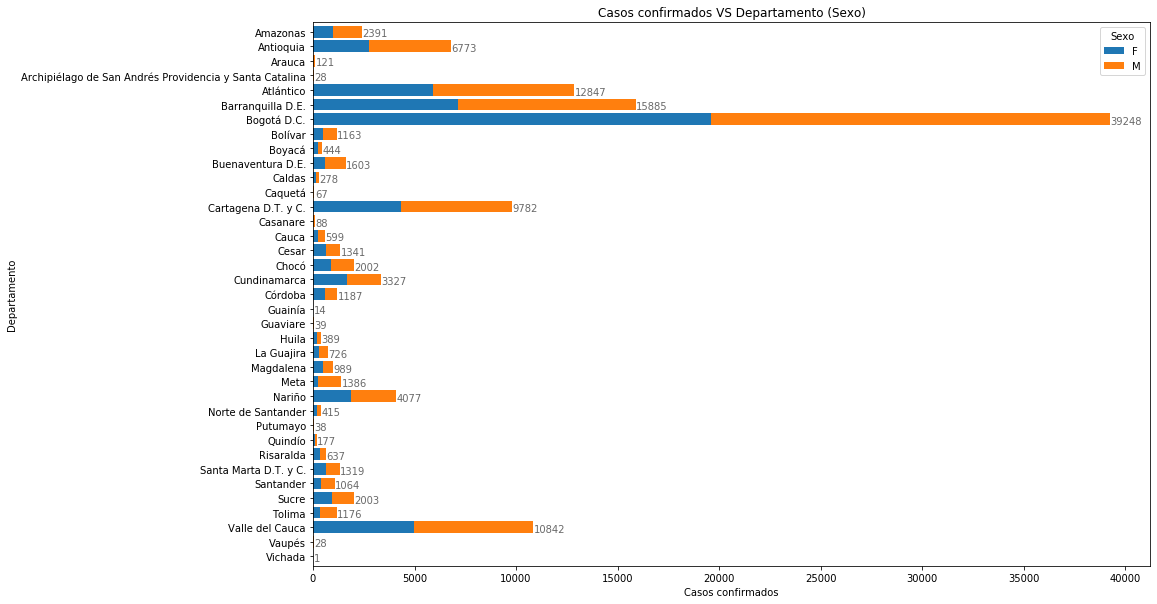

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Departamento,,,,,,,,,,
Amazonas,121,432,493,460,322,258,158,99,43,5
Antioquia,275,621,1841,1735,968,747,345,146,78,17
Arauca,2,32,53,25,4,3,2,0,0,0
Archipiélago de San Andrés Providencia y Santa Catalina,0,1,8,9,6,3,1,0,0,0
Atlántico,544,920,2852,3024,2028,1683,977,539,237,43
Barranquilla D.E.,543,974,3451,3748,2453,2143,1357,758,379,79
Bogotá D.C.,2080,3331,8992,8359,6154,5126,2873,1477,717,139
Bolívar,50,107,262,292,165,104,83,59,37,4
Boyacá,27,37,86,84,70,48,38,29,20,5


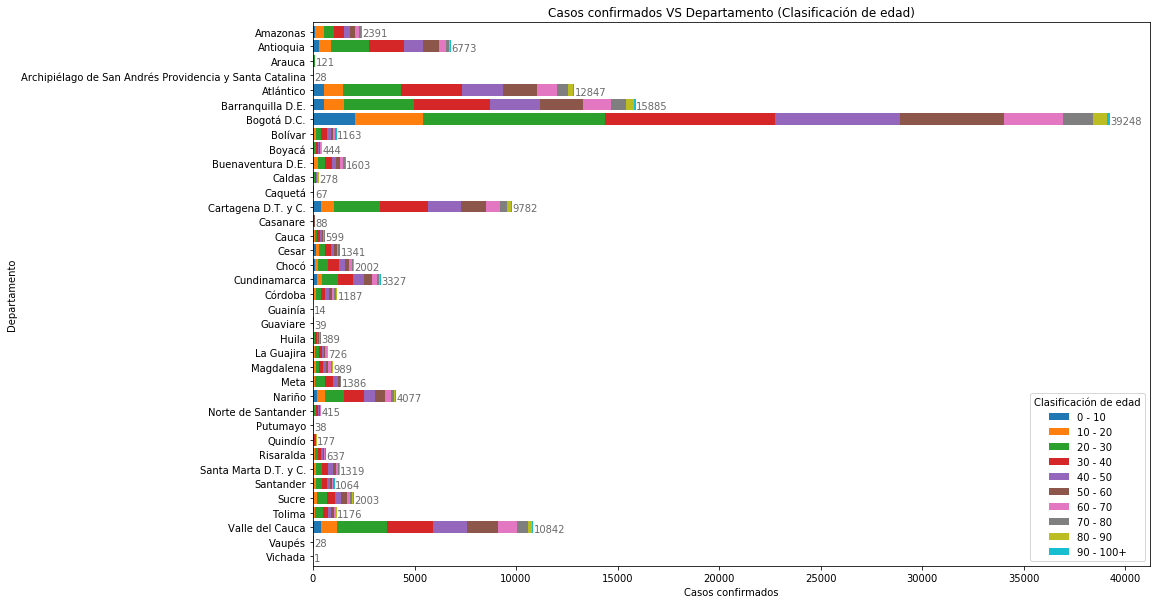

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Departamento,,,,,,
Amazonas,186.0,98.0,9.0,8.0,1.0,2089.0
Antioquia,3991.0,57.0,318.0,41.0,5.0,2361.0
Arauca,109.0,0.0,3.0,1.0,0.0,8.0
Archipiélago de San Andrés Providencia y Santa Catalina,6.0,0.0,0.0,0.0,1.0,21.0
Atlántico,6956.0,637.0,510.0,89.0,29.0,4626.0
Barranquilla D.E.,8166.0,954.0,756.0,109.0,50.0,5850.0
Bogotá D.C.,20844.0,881.0,2105.0,140.0,50.0,15228.0
Bolívar,638.0,51.0,61.0,7.0,10.0,396.0
Boyacá,148.0,13.0,28.0,3.0,5.0,247.0


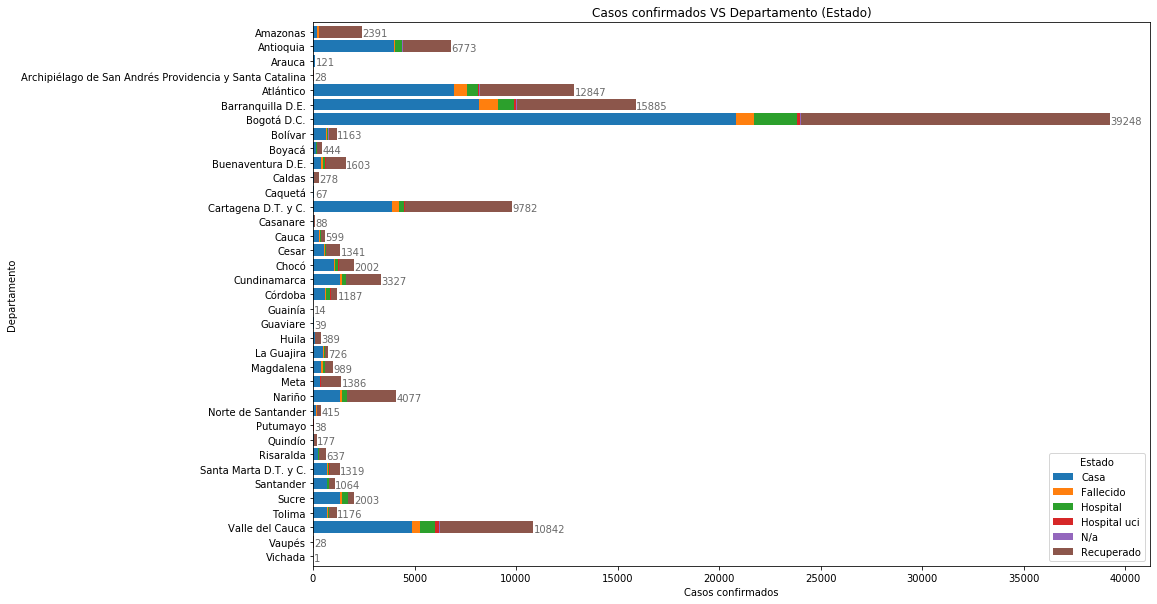

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Estado,,
Casa,28435,32306
Fallecido,1649,2710
Hospital,2741,3648
Hospital uci,334,563
N/a,111,136
Recuperado,24199,27662


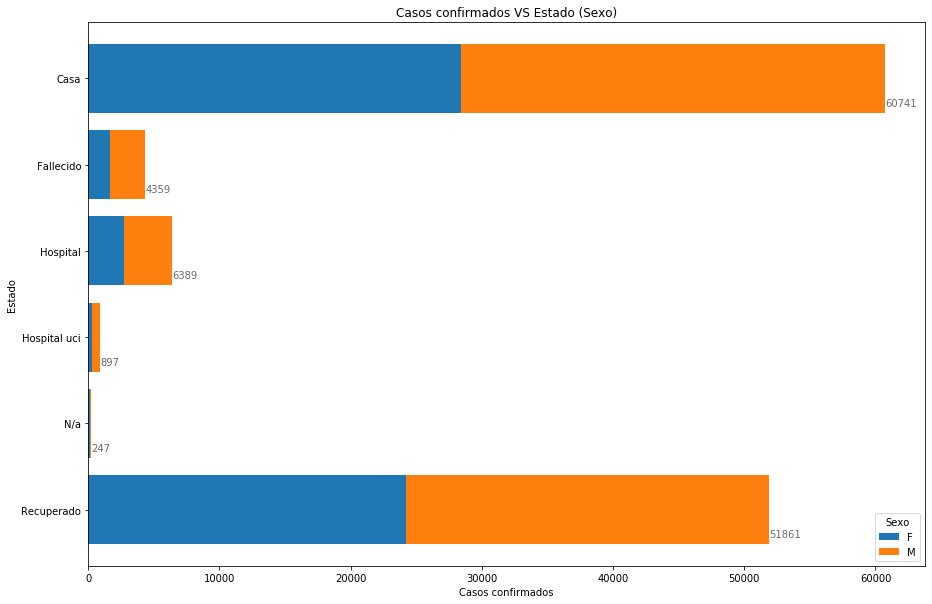

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Estado,,,,,,,,,,
Casa,2651,5016,15511,15019,9476,7212,3595,1528,628,105
Fallecido,11,11,70,166,373,652,1036,1063,785,192
Hospital,226,156,557,884,989,1310,1077,762,373,55
Hospital uci,38,21,35,95,125,196,206,132,42,7
N/a,6,7,11,13,18,29,56,52,43,12
Recuperado,2636,4899,12505,11904,8066,6268,3318,1571,593,101


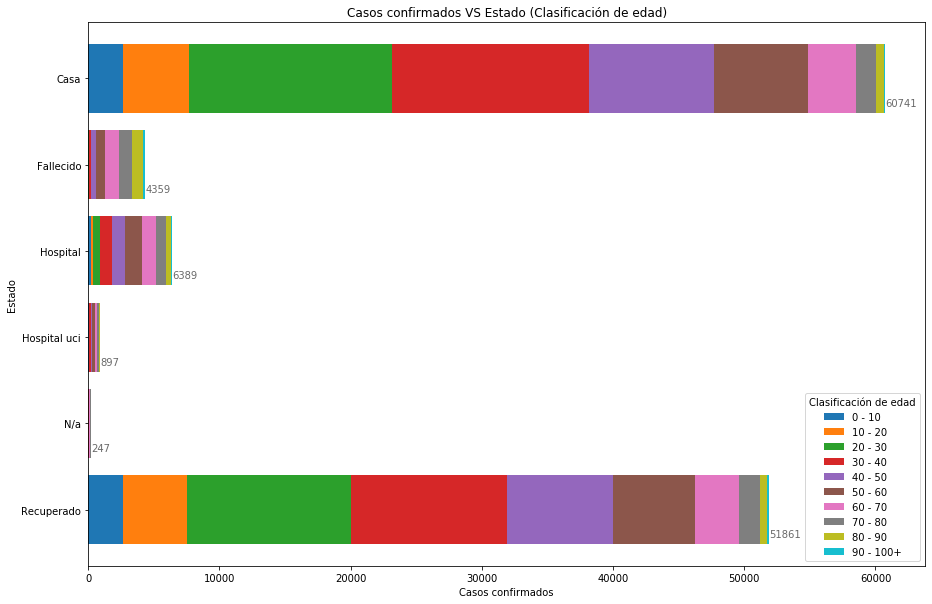

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Tipo,,
En estudio,52038,56551
Importado,445,510
Relacionado,4986,9964


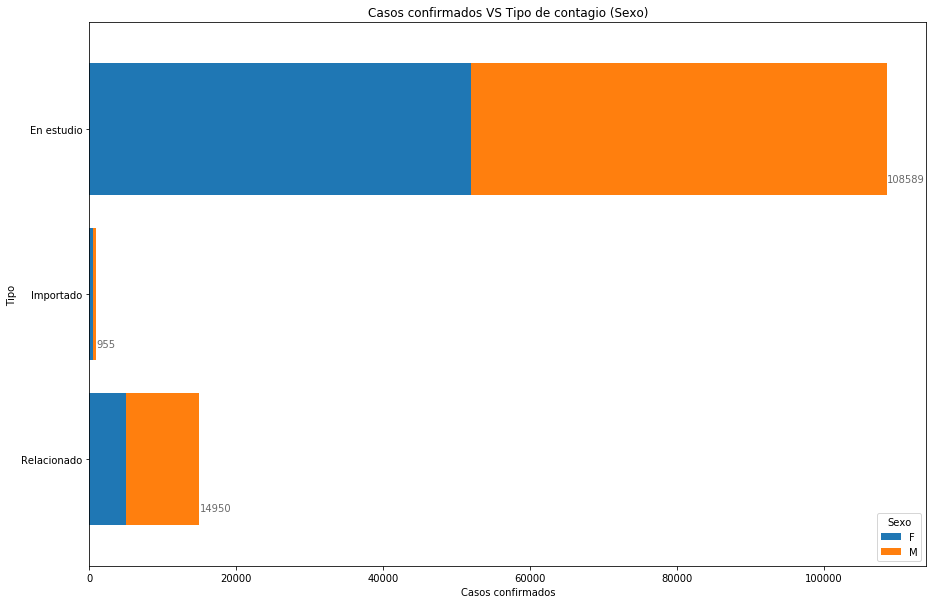

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Tipo,,,,,,,,,,
En estudio,4794,8041,24323,24367,16950,14143,8500,4746,2294,431
Importado,5,34,236,224,169,148,94,35,9,1
Relacionado,769,2035,4130,3490,1928,1376,694,327,161,40


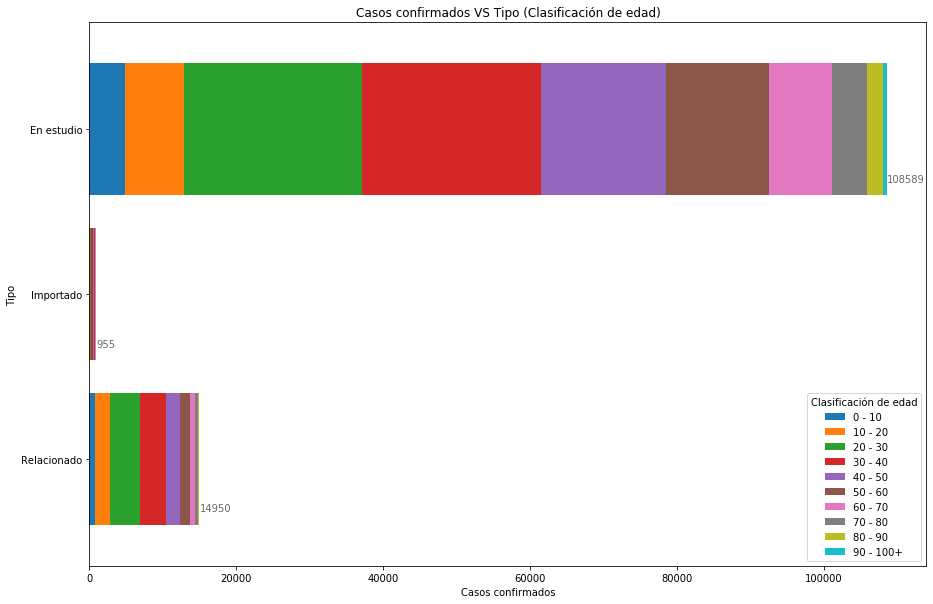

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Clasificación de edad,,
0 - 10,2832,2736
10 - 20,4522,5588
20 - 30,13243,15446
30 - 40,12777,15304
40 - 50,8778,10269
50 - 60,7217,8450
60 - 70,4303,4985
70 - 80,2304,2804
80 - 90,1226,1238


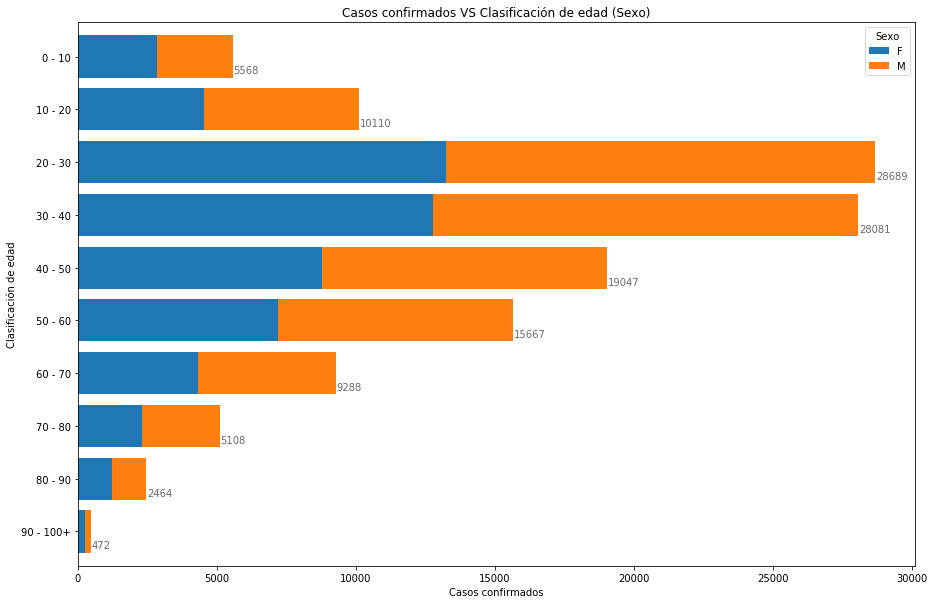

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Clasificación de edad,,,,,,
0 - 10,2651,11,226,38,6,2636
10 - 20,5016,11,156,21,7,4899
20 - 30,15511,70,557,35,11,12505
30 - 40,15019,166,884,95,13,11904
40 - 50,9476,373,989,125,18,8066
50 - 60,7212,652,1310,196,29,6268
60 - 70,3595,1036,1077,206,56,3318
70 - 80,1528,1063,762,132,52,1571
80 - 90,628,785,373,42,43,593


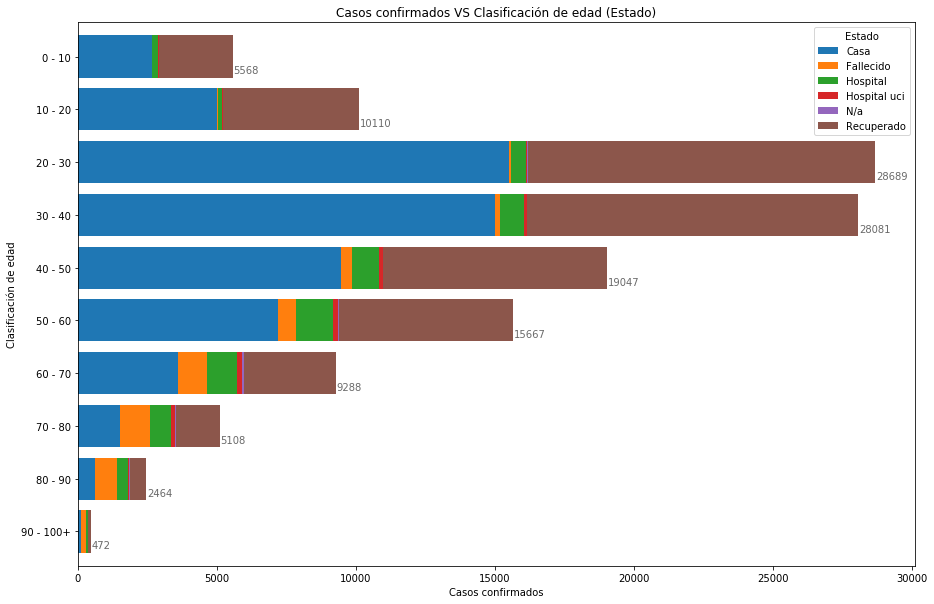

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06 00:00:00,1.0,0.0
2020-03-09 00:00:00,1.0,1.0
2020-03-11 00:00:00,4.0,2.0
2020-03-12 00:00:00,5.0,0.0
2020-03-13 00:00:00,2.0,3.0
...,...,...
2020-07-04 00:00:00,1719.0,2140.0
2020-07-05 00:00:00,1615.0,1858.0
2020-07-06 00:00:00,1439.0,1614.0


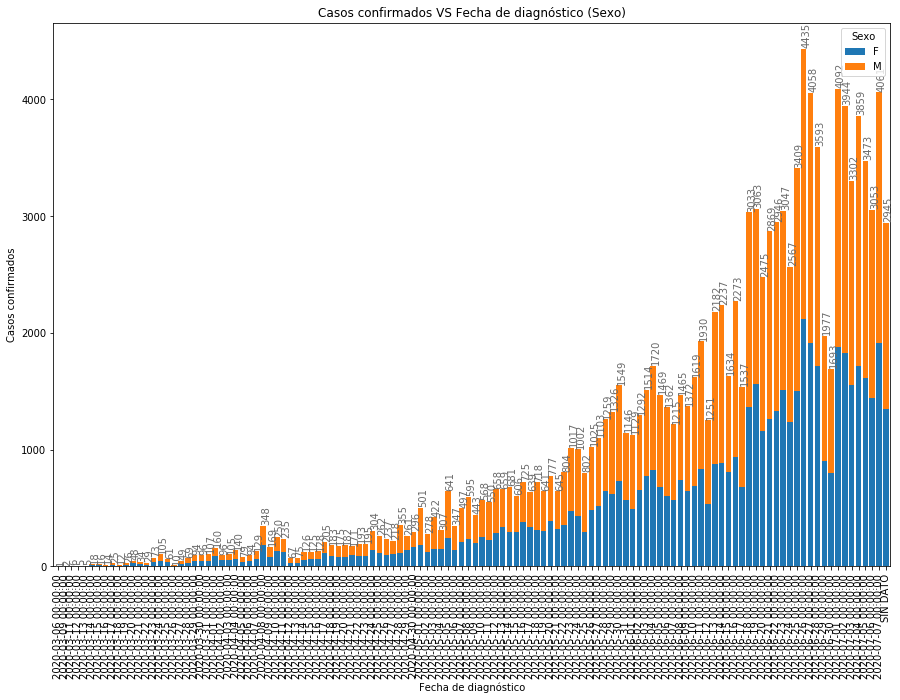

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06 00:00:00,0,1,0,0,0,0,0,0,0,0
2020-03-09 00:00:00,0,0,0,1,1,0,0,0,0,0
2020-03-11 00:00:00,0,0,4,0,0,1,0,0,1,0
2020-03-12 00:00:00,0,0,0,1,1,1,1,1,0,0
2020-03-13 00:00:00,0,0,1,0,2,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-04 00:00:00,132,260,957,985,556,447,286,164,62,10
2020-07-05 00:00:00,129,242,775,788,537,489,297,139,65,12
2020-07-06 00:00:00,132,232,686,725,479,402,240,97,45,15


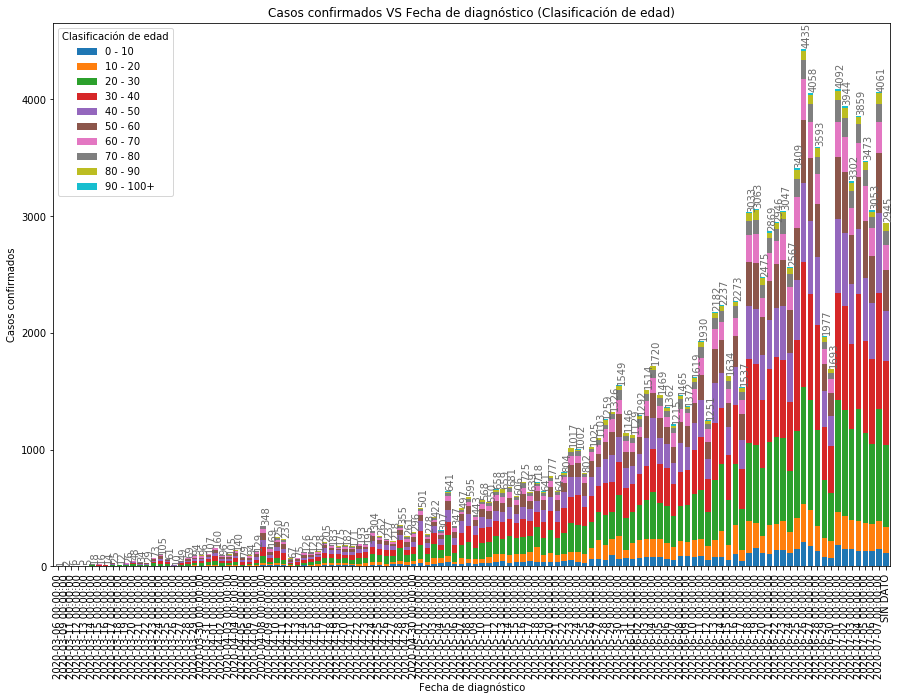

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09 00:00:00,0.0,0.0,0.0,0.0,0.0,2.0
2020-03-11 00:00:00,0.0,0.0,0.0,0.0,0.0,6.0
2020-03-12 00:00:00,0.0,0.0,0.0,0.0,0.0,5.0
2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,5.0
...,...,...,...,...,...,...
2020-07-04 00:00:00,3417.0,71.0,330.0,33.0,5.0,3.0
2020-07-05 00:00:00,3168.0,58.0,208.0,24.0,2.0,13.0
2020-07-06 00:00:00,2807.0,42.0,185.0,16.0,2.0,1.0


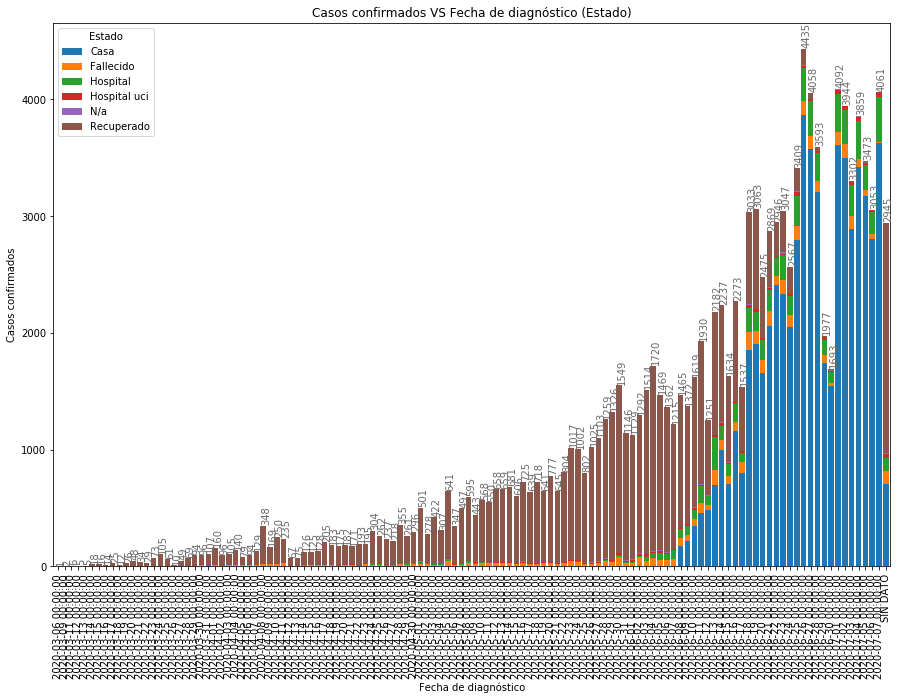

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo,F,M
Fecha de diagnóstico,,
2020-03-06 00:00:00,1.0,0.0
2020-03-09 00:00:00,2.0,1.0
2020-03-11 00:00:00,6.0,3.0
2020-03-12 00:00:00,11.0,3.0
2020-03-13 00:00:00,13.0,6.0
...,...,...
2020-07-04 00:00:00,51159.0,59803.0
2020-07-05 00:00:00,52774.0,61661.0
2020-07-06 00:00:00,54213.0,63275.0


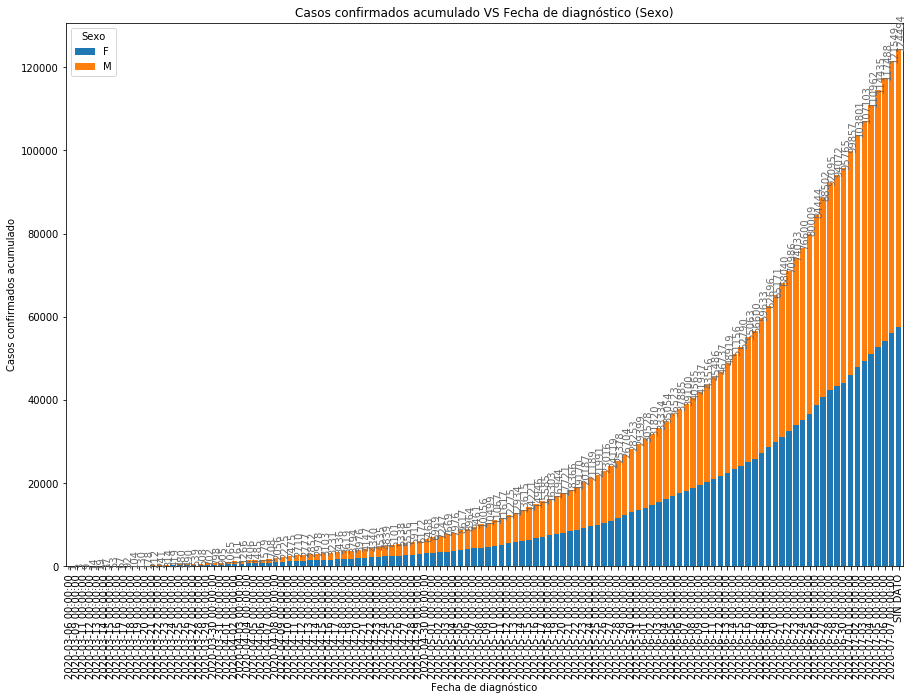

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad,0 - 10,10 - 20,20 - 30,30 - 40,40 - 50,50 - 60,60 - 70,70 - 80,80 - 90,90 - 100+
Fecha de diagnóstico,,,,,,,,,,
2020-03-06 00:00:00,0,1,0,0,0,0,0,0,0,0
2020-03-09 00:00:00,0,1,0,1,1,0,0,0,0,0
2020-03-11 00:00:00,0,1,4,1,1,1,0,0,1,0
2020-03-12 00:00:00,0,1,4,2,2,2,1,1,1,0
2020-03-13 00:00:00,0,1,5,2,4,2,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
2020-07-04 00:00:00,5043,9173,25570,24853,16913,13917,8268,4598,2200,427
2020-07-05 00:00:00,5172,9415,26345,25641,17450,14406,8565,4737,2265,439
2020-07-06 00:00:00,5304,9647,27031,26366,17929,14808,8805,4834,2310,454


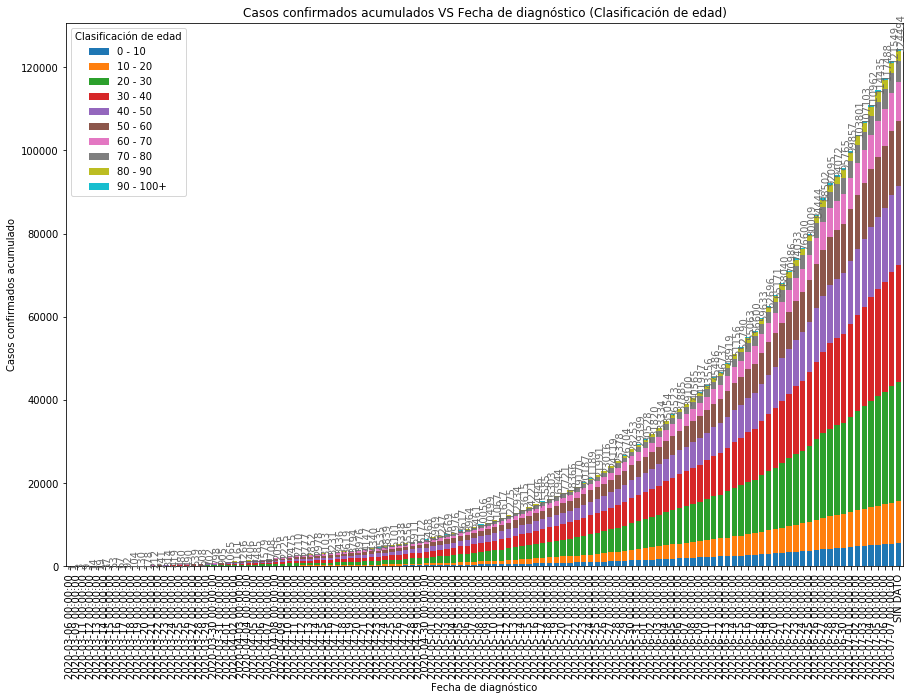

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado,Casa,Fallecido,Hospital,Hospital uci,N/a,Recuperado
Fecha de diagnóstico,,,,,,
2020-03-06 00:00:00,0.0,0.0,0.0,0.0,0.0,1.0
2020-03-09 00:00:00,0.0,0.0,0.0,0.0,0.0,3.0
2020-03-11 00:00:00,0.0,0.0,0.0,0.0,0.0,9.0
2020-03-12 00:00:00,0.0,0.0,0.0,0.0,0.0,14.0
2020-03-13 00:00:00,0.0,0.0,0.0,0.0,0.0,19.0
...,...,...,...,...,...,...
2020-07-04 00:00:00,50435.0,4139.0,5500.0,784.0,232.0,49872.0
2020-07-05 00:00:00,53603.0,4197.0,5708.0,808.0,234.0,49885.0
2020-07-06 00:00:00,56410.0,4239.0,5893.0,824.0,236.0,49886.0


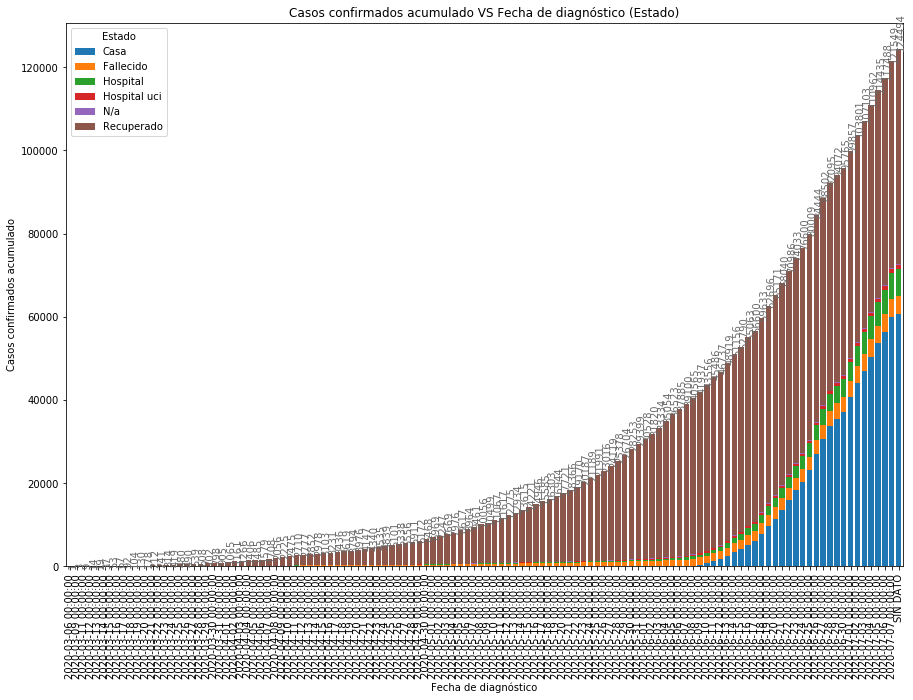

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuedateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>